In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Housing.csv')

# Understanding the data

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.shape

(545, 13)

In [9]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Exploratory Data Analysis

In [10]:
# Finding the categorical varible
df['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [11]:
# Group Analysis
df.groupby('mainroad')['price'].mean()

mainroad
no     3.398905e+06
yes    4.991777e+06
Name: price, dtype: float64

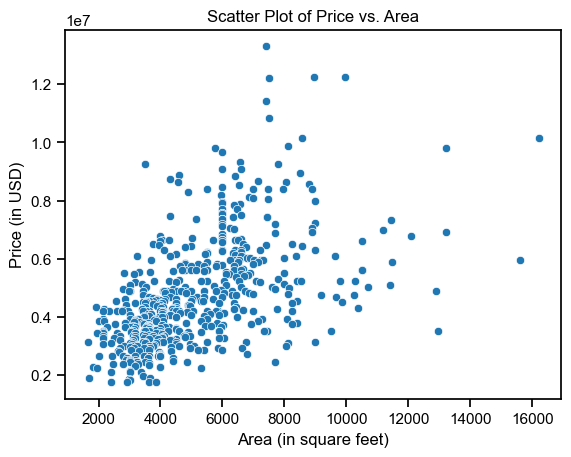

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved scatter plot 
sns.scatterplot(x='area', y='price', data=df)

# Add plot title and axis labels
plt.title('Scatter Plot of Price vs. Area')
plt.xlabel('Area (in square feet)')
plt.ylabel('Price (in USD)')

# Optional: Improve plot aesthetics using Seaborn themes
sns.set_theme(style="whitegrid")

# Display the plot
plt.show()


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
# Generating example data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Random numbers between 0 and 10
y = 2.5 * X + np.random.randn(100, 1) * 2  # Linear relation with noise

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X)

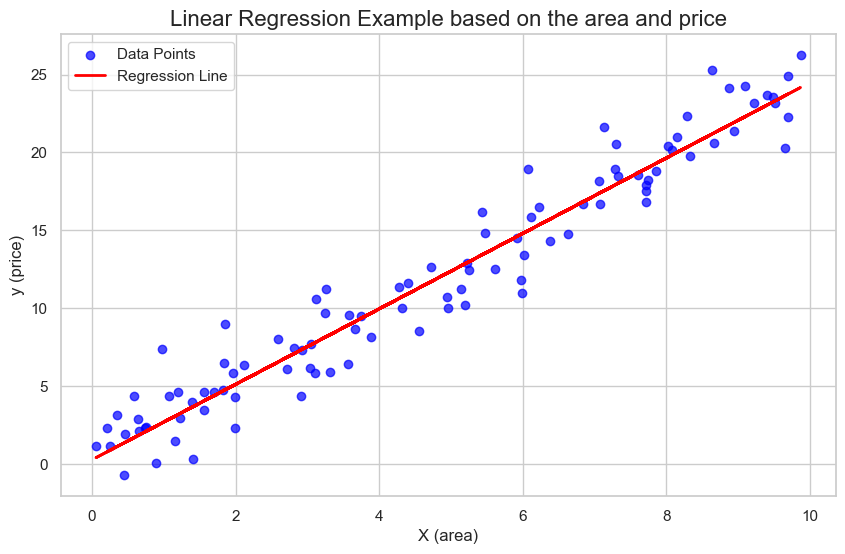

In [25]:
plt.figure(figsize=(10, 6))
# Scatter plot of actual data points
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.7)
# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression Line', linewidth=2)
# Add labels and title
plt.title('Linear Regression Example based on the area and price', fontsize=16)
plt.xlabel('X (area)', fontsize=12)
plt.ylabel('y (price)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# Outlier Detection 

In [26]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = np.where((y < lower_bound) | (y > upper_bound))
print("Outlier Indices:", outliers)


Outlier Indices: (array([], dtype=int64), array([], dtype=int64))


In [27]:
from scipy.stats import zscore

# Calculate Z-scores for y
z_scores = zscore(y)
outliers = np.where(np.abs(z_scores) > 3)
print("Outlier Indices:", outliers)


Outlier Indices: (array([], dtype=int64), array([], dtype=int64))


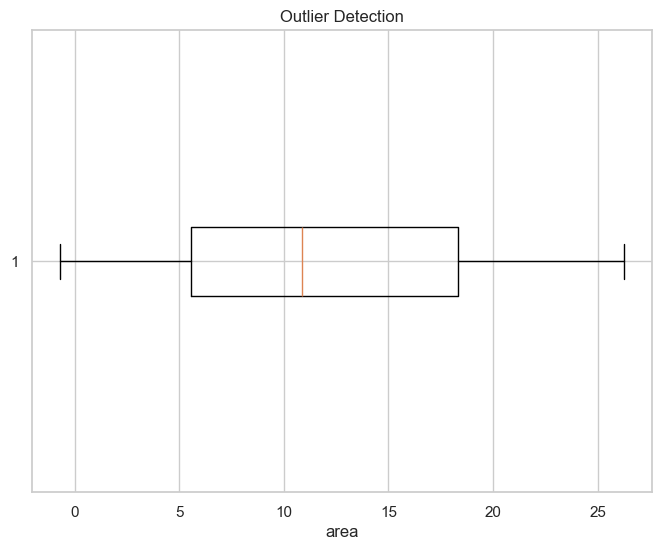

In [29]:
# Visualizing the outlier using the boxplot 
plt.figure(figsize = (8,6))
plt.boxplot(y, vert = False)
plt.title("Outlier Detection")
plt.xlabel('area',fontsize = 12)
plt.grid(True)
plt.show()

# Feature engineering

In [30]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [33]:
# Handling the categorical variable
df = pd.get_dummies(df,drop_first = True)

In [34]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [35]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [36]:
correlation_matrix = pd.DataFrame(df_scaled).corr()
print(correlation_matrix)

          0         1         2         3         4         5         6   \
0   1.000000  0.535997  0.366494  0.517545  0.420712  0.384394  0.296898   
1   0.535997  1.000000  0.151858  0.193820  0.083996  0.352980  0.288874   
2   0.366494  0.151858  1.000000  0.373930  0.408564  0.139270 -0.012033   
3   0.517545  0.193820  0.373930  1.000000  0.326165  0.177496  0.042398   
4   0.420712  0.083996  0.408564  0.326165  1.000000  0.045547  0.121706   
5   0.384394  0.352980  0.139270  0.177496  0.045547  1.000000  0.204433   
6   0.296898  0.288874 -0.012033  0.042398  0.121706  0.204433  1.000000   
7   0.255517  0.140297  0.080549  0.126469  0.043538  0.037466  0.092337   
8   0.187057  0.047417  0.097312  0.102106 -0.172394  0.051497  0.044002   
9   0.093073 -0.009229  0.046049  0.067159  0.018847  0.067864 -0.011781   
10  0.452954  0.222393  0.160603  0.186915  0.293602  0.159173  0.105423   
11  0.329777  0.234779  0.079023  0.063472  0.044425  0.091627  0.199876   
12  0.063656

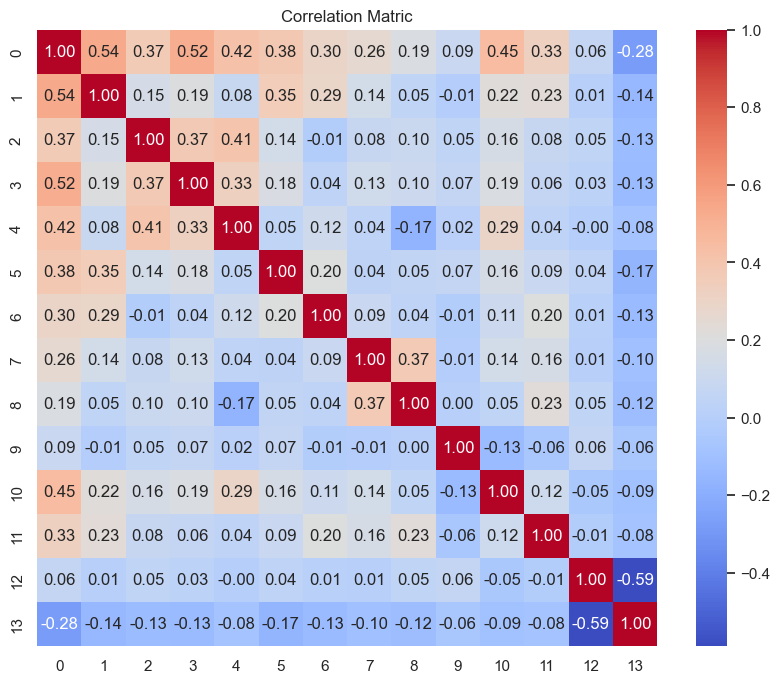

In [37]:
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm',fmt = ".2f")
plt.title("Correlation Matric")
plt.show()

# visualizing the multi collinerity 

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming `df` contains your dataset
X = df.select_dtypes(include=['float64', 'int64']).dropna()  # Use only numerical columns
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

     Feature        VIF
0      price  17.110853
1       area   8.895295
2   bedrooms  13.766850
3  bathrooms  10.718360
4    stories   7.463489
5    parking   2.017673


In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)
print(f"Number of PCA components: {pca.n_components_}")


Number of PCA components: 6


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [43]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)


In [45]:
import numpy as np

df['price_log'] = np.log1p(df['price'])


<Axes: >

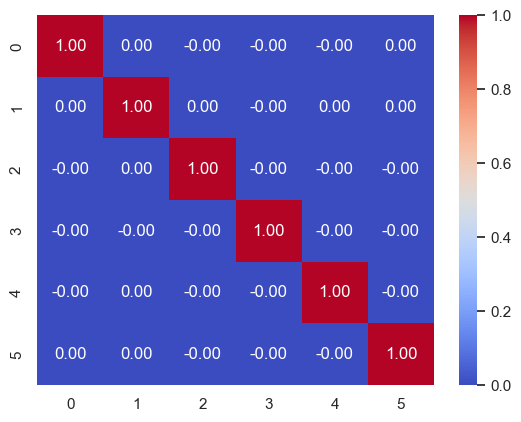

In [46]:
correlation_matrix = pd.DataFrame(X_pca).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Feature Scaling 

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
print(scaled_df)

[[1.         0.39656357 0.6        ... 0.         0.         1.        ]
 [0.90909091 0.5024055  0.6        ... 0.         0.         0.95945163]
 [0.90909091 0.57113402 0.4        ... 1.         0.         0.95945163]
 ...
 [0.         0.13539519 0.2        ... 0.         1.         0.        ]
 [0.         0.08659794 0.4        ... 0.         0.         0.        ]
 [0.         0.15120275 0.4        ... 0.         1.         0.        ]]


In [48]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
scaled_df = scaler.fit_transform(df)
print(scaled_df)

[[ 4.56636513  1.04672629  1.40341936 ... -0.84488844 -0.6964292
   2.9484085 ]
 [ 4.00448405  1.75700953  1.40341936 ... -0.84488844 -0.6964292
   2.72723342]
 [ 4.00448405  2.21823241  0.04727831 ...  1.18358821 -0.6964292
   2.72723342]
 ...
 [-1.61432675 -0.70592066 -1.30886273 ... -0.84488844  1.43589615
  -2.50618968]
 [-1.61432675 -1.03338891  0.04727831 ... -0.84488844 -0.6964292
  -2.50618968]
 [-1.61432675 -0.5998394   0.04727831 ... -0.84488844  1.43589615
  -2.50618968]]


In [49]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaled_df = scaler.fit_transform(df)
print(scaled_df)

[[1.         0.45802469 0.66666667 ... 0.         0.         1.        ]
 [0.92105263 0.55308642 0.66666667 ... 0.         0.         0.99498648]
 [0.92105263 0.61481481 0.5        ... 1.         0.         0.99498648]
 ...
 [0.13157895 0.22345679 0.33333333 ... 0.         1.         0.87635714]
 [0.13157895 0.17962963 0.5        ... 0.         0.         0.87635714]
 [0.13157895 0.23765432 0.5        ... 0.         1.         0.87635714]]


In [54]:
corr_matrix = df.corr()

# Identify features with high correlation (>0.9) and remove one from each pair
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

# Drop correlated features
df.drop(columns=correlated_features, inplace=True)


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    bool 
 7   guestroom_yes                    545 non-null    bool 
 8   basement_yes                     545 non-null    bool 
 9   hotwaterheating_yes              545 non-null    bool 
 10  airconditioning_yes              545 non-null    bool 
 11  prefarea_yes                     545 non-null    bool 
 12  furnishingstatus_semi-furnished  545 non-null    b

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Example for categorical features
X = df.drop('mainroad_yes', axis=1)  # Feature set
y = df['mainroad_yes']  # Target variable

# Apply chi-square test
chi2_selector = SelectKBest(chi2, k=5)  # Select top 5 features
X_new = chi2_selector.fit_transform(X, y)


In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Example for numerical features
f_test_selector = SelectKBest(f_classif, k=5)  # Select top 5 features
X_new = f_test_selector.fit_transform(X, y)


# Featuring Extraction

In [61]:
# Example: Extracting mean and standard deviation from a column
mean_value = df['area'].mean()
std_value = df['area'].std()

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df)


# Modeling

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [72]:
# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [76]:
# Predict house prices on the test set
y_pred = model.predict(X_test)

In [77]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.23979849434927927


In [78]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.10472835110491283


In [79]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.10472835110491283


In [80]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


R-squared (R²): 0.11753365994505738


In [81]:
# Adjusted R² formula
n = len(y_test)  # Number of data points
p = X_test.shape[1]  # Number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2}")


Adjusted R-squared: -0.0032248918519348635


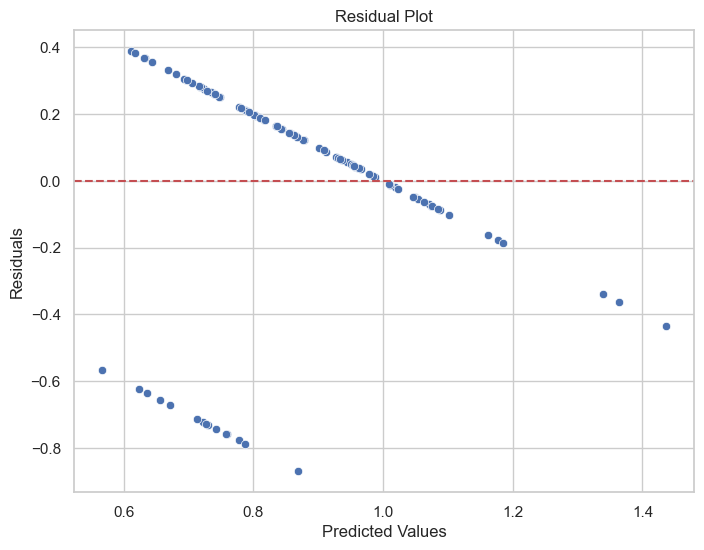

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


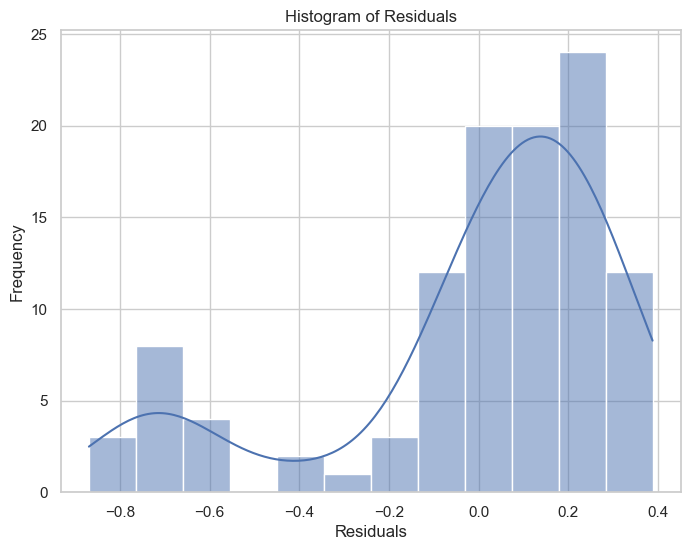

In [83]:
# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [84]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print average cross-validation MSE
print(f"Average Cross-Validation MSE: {-cv_scores.mean()}")


Average Cross-Validation MSE: 0.12212610484972126


In [85]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [86]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [88]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [89]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [90]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [91]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.23979849434927927


In [95]:
from sklearn.model_selection import cross_val_score

# Cross-validation with Random Forest
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())


Cross-validation scores: [ 0.12517478 -0.24731457  0.0840287   0.12317509  0.13266263]
Average score: 0.0435453257534679


In [97]:
!pip install flask

In [98]:
import flask
print(flask.__version__)


3.1.0


C:\Users\asus\AppData\Local\Temp\ipykernel_15268\2000271723.py:2: DeprecationWarning: The '__version__' attribute is deprecated and will be removed in Flask 3.1. Use feature detection or 'importlib.metadata.version("flask")' instead.
  print(flask.__version__)


In [100]:
import joblib

In [102]:
joblib.dump(LinearRegression,"Housing_price_predictor_model.pki")

['Housing_price_predictor_model.pki']

In [103]:
model = joblib.load("Housing_price_predictor_model.pki")

In [108]:
model()

LinearRegression()